In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('CC GENERAL.csv')
df.drop('CUST_ID', axis=1, inplace=True)
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean())
df = df.dropna(axis = 0, subset = ['CREDIT_LIMIT'])

In [8]:
class PCA ():

    def __init__(self,n_components = 0.95):
        self.n_components = n_components
        if self.n_components > 1:
            self.type = 'var'
        else:
            self.type = 'ratio'

    def fit(self,X):

        self.mean = np.mean(X,axis=0)
        self.std = np.std(X,axis=0)
        # fill
        normMat =(X- self.mean)/self.std
        covMat = np.cov(normMat.transpose())
        #print(X.shape)
        #print(covMat.shape)
        eig_value,eig_vector = np.linalg.eig(covMat)
#         self.fullComponents = eig_value.reshape((1,-1)),eig_vector
        #print(eig_value.astype(int))
#         print(eig_vector.astype(int))
        if self.n_components>=1:
            X_new = normMat@eig_vector[:,:int(n_components)]
        else: 
            
            
            sum_eig = np.sum(eig_value)
            #print(sum_eig)
            explained_var = eig_value/ sum_eig
            #print(explained_var)
            self.cumulative_sum = np.cumsum(explained_var)
    
            #print("*****",self.cumulative_sum.shape)
            numOfComp = np.argmax(self.cumulative_sum >= self.n_components)
            
            self.numOfComp = numOfComp
            self.components = eig_vector[:,:self.numOfComp] 
            X_new = normMat@self.components      
            
        #print(self.numOfComp)
        return X_new

    def transform(self,Z):
        # fill
        normMat =(Z- self.mean)/self.std
        Z_new = normMat@self.components
        #print(self.numOfComp) 
        return Z_new

    #optional 
    def plot_explained_variance(self):
        plt.plot(self.cumulative_sum)

In [9]:
pca_section = PCA(n_components=0.95)

In [10]:
X_transofmed = pca_section.fit(df.values)

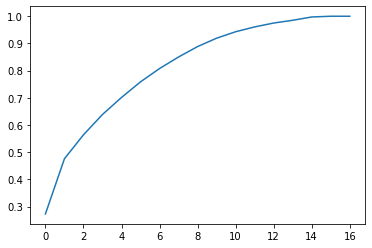

In [11]:
pca_section.plot_explained_variance()

In [12]:
print(pca_section.components.shape)
print("expected shape: (17,11)")

(17, 11)
expected shape: (17,11)


In [13]:
pca_section.transform(df.values).shape

(8949, 11)